In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# data files
data_path = '../Datasets/120OlympicHistory_AthletesResults_dataset/athlete_events.csv'

# Read the data and filter results
data = pd.read_csv(data_path)
olympic_df = pd.DataFrame(data)

In [2]:
russia_df = olympic_df.loc[(((olympic_df["NOC"] == "RUS") |
                            (olympic_df["NOC"] == "URS") |
                            (olympic_df["NOC"] == "EUN")) &
                           ((olympic_df["Year"] >= 1952) &
                            (olympic_df["Year"] <= 2010)))].copy()
russia_df.count()

ID        10103
Name      10103
Sex       10103
Age        9990
Height     9196
Weight     9119
Team      10103
NOC       10103
Games     10103
Year      10103
Season    10103
City      10103
Sport     10103
Event     10103
Medal      3607
dtype: int64

In [3]:
russia_medals = russia_df["Medal"].unique()
print(russia_medals)

['Silver' nan 'Gold' 'Bronze']


In [4]:
#gold_se = russia_df.loc[(russia_df["Medal"] == "Gold")].groupby("Year")["Medal"].count()
#silver_se = russia_df.loc[(russia_df["Medal"] == "Silver")].groupby("Year")["Medal"].count()
#gold_se = russia_df.loc[(russia_df["Medal"] == "Bronze")].groupby("Year")["Medal"].count()
winter_medals_df = russia_df.loc[((russia_df["Medal"] == "Gold") | (russia_df["Medal"] == "Silver") | (russia_df["Medal"] == "Bronze")) & (russia_df["Year"] <= 2014) & (russia_df["Year"] >= 1966) & (russia_df["Season"] == "Winter")].groupby("Year")["Medal"].count()
winter_medals_df = pd.DataFrame(winter_medals_df)
winter_medals_df.sort_values(["Year"], ascending=True, inplace=True)
summer_medals_df = russia_df.loc[((russia_df["Medal"] == "Gold") | (russia_df["Medal"] == "Silver") | (russia_df["Medal"] == "Bronze")) & (russia_df["Year"] <= 2014) & (russia_df["Year"] >= 1966) & (russia_df["Season"] == "Summer")].groupby("Year")["Medal"].count()
summer_medals_df = pd.DataFrame(summer_medals_df)
summer_medals_df.sort_values(["Year"], ascending=True, inplace=True)
print(winter_medals_df)
print(summer_medals_df)

      Medal
Year       
1968     37
1972     45
1976     56
1980     54
1984     56
1988     66
1992     59
1994     36
1998     52
2002     38
2006     41
2010     25
      Medal
Year       
1968    192
1972    214
1976    286
1980    442
1988    300
1992    220
1996    115
2000    187
2004    189
2008    142


In [5]:
# data on winter events
russian_wevents_df = russia_df.loc[(russia_df["Year"] >= 1966) & (russia_df["Year"] <= 2014) & (russia_df["Season"] == "Winter")].groupby("Year")["Event"].unique()
russian_wevents_df = pd.DataFrame(russian_wevents_df)
russian_wevents_df["Total_Events"] = russian_wevents_df["Event"].str.len()
russian_wevents_df.sort_values(["Year"], ascending=True, inplace=True)

# data on winter athletes
russian_wathletes_df = russia_df.loc[(russia_df["Year"] >= 1966) & (russia_df["Year"] <= 2014) & (russia_df["Season"] == "Winter")].groupby("Year")["Name"].unique()
russian_wathletes_df = pd.DataFrame(russian_wathletes_df)
russian_wathletes_df["Total_Athletes"] = russian_wathletes_df["Name"].str.len()
russian_wathletes_df.sort_values(["Year"], ascending=True, inplace=True)
print(russian_wevents_df)
print(russian_wathletes_df)

                                                  Event  Total_Events
Year                                                                 
1968  [Cross Country Skiing Women's 5 kilometres, Cr...            30
1972  [Nordic Combined Men's Individual, Biathlon Me...            33
1976  [Ice Hockey Men's Ice Hockey, Cross Country Sk...            35
1980  [Biathlon Men's 10 kilometres Sprint, Biathlon...            35
1984  [Bobsleigh Men's Two, Bobsleigh Men's Four, Lu...            38
1988  [Luge Mixed (Men)'s Doubles, Figure Skating Mi...            40
1992  [Short Track Speed Skating Women's 3,000 metre...            52
1994  [Ice Hockey Men's Ice Hockey, Speed Skating Me...            56
1998  [Biathlon Women's 7.5 kilometres Sprint, Biath...            52
2002  [Figure Skating Men's Singles, Ice Hockey Men'...            62
2006  [Speed Skating Women's 1,000 metres, Speed Ska...            75
2010  [Speed Skating Women's 1,500 metres, Bobsleigh...            77
                    

In [6]:

# data on summer events
russian_sevents_df = russia_df.loc[(russia_df["Year"] >= 1966) & (russia_df["Year"] <= 2014) & (russia_df["Season"] == "Summer")].groupby("Year")["Event"].unique()
russian_sevents_df = pd.DataFrame(russian_sevents_df)
russian_sevents_df["Total_Events"] = russian_sevents_df["Event"].str.len()
russian_sevents_df.sort_values(["Year"], ascending=True, inplace=True)

# data on summer athletes
russian_sathletes_df = russia_df.loc[(russia_df["Year"] >= 1966) & (russia_df["Year"] <= 2014) & (russia_df["Season"] == "Summer")].groupby("Year")["Name"].unique()
russian_sathletes_df = pd.DataFrame(russian_sathletes_df)
russian_sathletes_df["Total_Athletes"] = russian_sathletes_df["Name"].str.len()
russian_sathletes_df.sort_values(["Year"], ascending=True, inplace=True)

print(russian_sevents_df)
print(russian_sathletes_df)

                                                  Event  Total_Events
Year                                                                 
1968  [Sailing Mixed Three Person Keelboat, Athletic...           164
1972  [Wrestling Men's Featherweight, Freestyle, Swi...           180
1976  [Fencing Men's epee, Individual, Fencing Men's...           189
1980  [Athletics Women's Shot Put, Athletics Men's 5...           202
1988  [Cycling Men's Road Race, Individual, Swimming...           221
1992  [Athletics Men's Hammer Throw, Diving Women's ...           234
1996  [Athletics Men's Decathlon, Athletics Women's ...           212
2000  [Basketball Women's Basketball, Water Polo Wom...           238
2004  [Cycling Women's Sprint, Cycling Women's 500 m...           235
2008  [Athletics Women's Javelin Throw, Athletics Wo...           242
                                                   Name  Total_Athletes
Year                                                                   
1968  [Valery Ye

In [7]:
# combine winter olympic data for events, athletes, and medals
russian_winter_olympics_df = pd.merge(russian_wevents_df, russian_wathletes_df, how="left", on="Year")
russian_winter_olympics_df = pd.merge(russian_winter_olympics_df, winter_medals_df, how="left", on="Year")
russian_winter_olympics_df.drop(["Event","Name"], axis=1, inplace=True)
russian_winter_olympics_df.reset_index(inplace=True)
print(russian_winter_olympics_df)

    Year  Total_Events  Total_Athletes  Medal
0   1968            30              74     37
1   1972            33              76     45
2   1976            35              79     56
3   1980            35              86     54
4   1984            38              99     56
5   1988            40             101     66
6   1992            52             129     59
7   1994            56             113     36
8   1998            52             122     52
9   2002            62             151     38
10  2006            75             174     41
11  2010            77             175     25


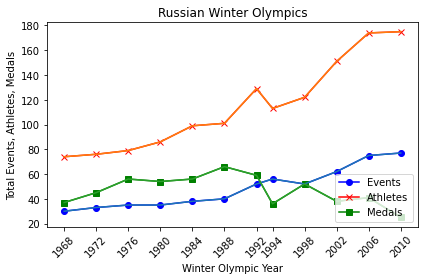

In [8]:
# chart the Russian winter olympic data
x_axis = russian_winter_olympics_df["Year"]
events = russian_winter_olympics_df["Total_Events"]
athletes = russian_winter_olympics_df["Total_Athletes"]
medals = russian_winter_olympics_df["Medal"]
plt.title("Russian Winter Olympics")
plt.xlabel("Winter Olympic Year")
plt.ylabel("Total Events, Athletes, Medals")
event_handle, = plt.plot(x_axis, events, marker ='o', color='blue', label="Events")
athletes_handle, = plt.plot(x_axis, athletes, marker ='x', color='red', label="Athletes")
medals_handle, = plt.plot(x_axis, medals, marker ='s', color='green', label="Medals")
plt.legend(loc="lower right")
plt.plot(x_axis, events)
plt.plot(x_axis, athletes)
plt.plot(x_axis, medals)
plt.xticks(x_axis, rotation=45)
plt.tight_layout()
plt.savefig("../Output Images/WinterAthletesEventsMedals.png")
plt.show()

The correlation coefficient between medal count and number of athletes is -0.47
The r-squared is: 0.21854317343841922


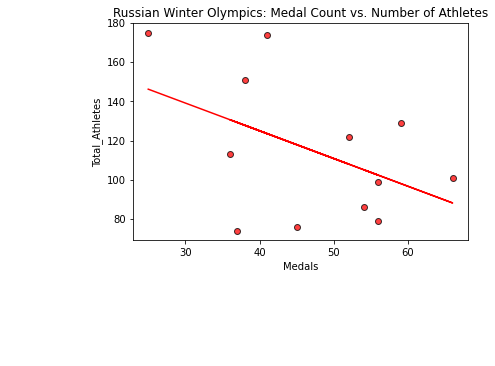

In [9]:
#Calculate the correlation coefficient and linear regression model 
# for medals vs athletes for winter events
print(f"The correlation coefficient between medal count and number of athletes is {round(st.pearsonr(medals,athletes)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(medals,athletes)
regress_values = medals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Russian Winter Olympics: Medal Count vs. Number of Athletes")
plt.xlabel("Medals")
plt.ylabel("Total_Athletes")
plt.scatter(medals,athletes, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.savefig("../Output Images/WinterAthletesMedals_CC_LR.png")
plt.plot(medals,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

In [10]:
russian_summer_olympics_df = pd.merge(russian_sevents_df, russian_sathletes_df, how="left", on="Year")
russian_summer_olympics_df = pd.merge(russian_summer_olympics_df, summer_medals_df, how="left", on="Year")
russian_summer_olympics_df.drop(["Event","Name"], axis=1, inplace=True)
russian_summer_olympics_df.reset_index(inplace=True)
print(russian_summer_olympics_df)

   Year  Total_Events  Total_Athletes  Medal
0  1968           164             312    192
1  1972           180             371    214
2  1976           189             410    286
3  1980           202             489    442
4  1988           221             480    300
5  1992           234             475    220
6  1996           212             390    115
7  2000           238             435    187
8  2004           235             446    189
9  2008           242             454    142


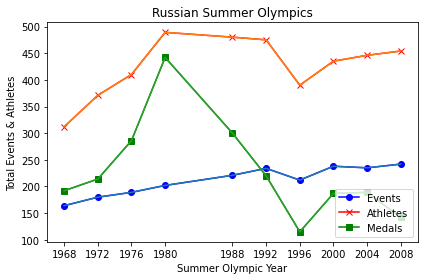

In [11]:
# chart the Russian summer olympic data
x_axis = russian_summer_olympics_df["Year"]
events = russian_summer_olympics_df["Total_Events"]
athletes = russian_summer_olympics_df["Total_Athletes"]
medals = russian_summer_olympics_df["Medal"]
plt.title("Russian Summer Olympics")
plt.xlabel("Summer Olympic Year")
plt.ylabel("Total Events & Athletes")
event_handle, = plt.plot(x_axis, events, marker ='o', color='blue', label="Events")
athletes_handle, = plt.plot(x_axis, athletes, marker ='x', color='red', label="Athletes")
medals_handle, = plt.plot(x_axis, medals, marker ='s', color='green', label="Medals")
plt.legend(loc="lower right")
plt.plot(x_axis, events)
plt.plot(x_axis, athletes)
plt.plot(x_axis, medals)
plt.xticks(x_axis)
plt.tight_layout()
plt.savefig("../Output Images/SummerAthletesEventsMedals.png")
plt.show()

The correlation coefficient between medal count and number of athletes is 0.45
The r-squared is: 0.20608849900160084


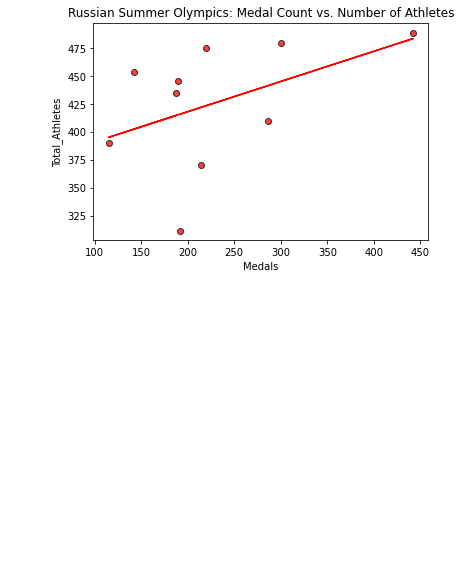

In [12]:
#Calculate the correlation coefficient and linear regression model 
# for medals vs athletes for summer events
print(f"The correlation coefficient between medal count and number of athletes is {round(st.pearsonr(medals,athletes)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(medals,athletes)
regress_values = medals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Russian Summer Olympics: Medal Count vs. Number of Athletes")
plt.xlabel("Medals")
plt.ylabel("Total_Athletes")
plt.scatter(medals,athletes, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.savefig("../Output Images/SummerAthletesMedals_CC_LR.png")
plt.plot(medals,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")